# import libraries

In [1]:
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
import seaborn as sns
from string import punctuation
import re

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import LancasterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score, ConfusionMatrixDisplay, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.pipeline import Pipeline

from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

C:\Users\Naser Rahal\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Read Data

In [2]:
df = pd.read_csv('./IMDB Dataset.csv')

In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# Explora and Clean Data

In [4]:
df.shape

(50000, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


#### check null

In [6]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [7]:
df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [8]:
df['text'] = df['review']
df = df[['text', 'sentiment']]

# Text Preprocessing

#### Preprocessing function

In [9]:
def Preprocessing(text):
    text = text.lower()
    text = re.sub('^a-zA-Z0-9',' ',text)
    text = re.sub('<.*?>',' ',text)
    text = "".join([x for x in text if x not in string.punctuation])
    text = re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    text = re.sub("(\\d|\\W)+"," ",text)
    text = text.split()
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in stuff_to_be_removed]
    text = " ".join(text)
    return text

In [10]:
stuff_to_be_removed = list(stopwords.words('english'))+list(punctuation)

In [11]:
df['cleaned_text'] = df.text.apply(Preprocessing)

# Word Cloud

In [12]:
tokens = str(list(df[df.sentiment=='positive'].cleaned_text)).split()

In [13]:
pos_words = (" ").join(tokens)

In [14]:
wc = WordCloud(height=800,width=1200).generate(pos_words)

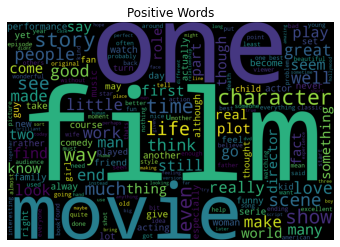

In [15]:
plt.imshow(wc)
plt.title("Positive Words")
plt.axis("off")
plt.show()

In [16]:
positive_words_frequency = Counter(tokens)

In [17]:
ps_f=positive_words_frequency.most_common(30)

In [18]:
data = pd.DataFrame(ps_f,columns=['word','freq']).sort_values('freq',ascending=False)

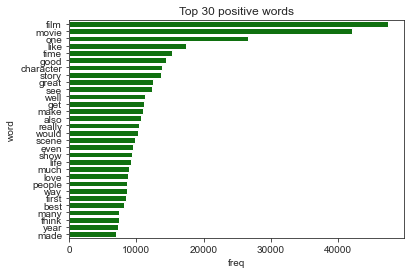

In [19]:
sns.set_style("ticks")
sns.barplot(x="freq",y='word',data=data,color='g').set(title='Top 30 positive words')

plt.show()

In [20]:
tokens_neg = str(list(df[df.sentiment=='negative'].cleaned_text)).split()

In [21]:
neg_words = (" ").join(tokens)

In [22]:
wc_neg = WordCloud(height=800,width=1200).generate(neg_words)

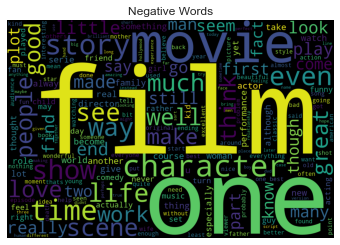

In [23]:
plt.imshow(wc_neg)
plt.title("Negative Words")
plt.axis("off")
plt.show()

In [24]:
neg_words_frequency = Counter(tokens)

In [25]:
neg_f=neg_words_frequency.most_common(30)

In [26]:
data_neg = pd.DataFrame(neg_f,columns=['word','freq']).sort_values('freq',ascending=False)

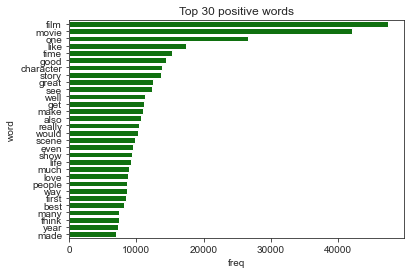

In [27]:
sns.set_style("ticks")
sns.barplot(x="freq",y='word',data=data,color='g').set(title='Top 30 positive words')

plt.show()

# Model Building

#### Data Spliting

In [28]:
X = df['cleaned_text']
y = df['sentiment']

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 42,stratify=y)

#### Tf idf Vectorizer

In [30]:
tfidf_vectorizer = TfidfVectorizer()

In [31]:
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

#### Selecting Model

In [32]:
def fit_predict(models,X_train,y_trian,X_test,y_test):
    y_pred=[]
    models_name=[]
    for model_name,model_obj in models.items():
        model_obj.fit(X_train,y_trian)
        print(f'{model_name} done....')
        y_pred.append(model_obj.predict(X_test))
        models_name.append(model_name)
    return y_pred , models_name

In [33]:
def get_score(y_pred,y_test):
    score = []
    n = 0
    best_model = y_pred[0]
    acc = accuracy_score(y_test,y_pred[0])
    for y in y_pred:
        score.append(accuracy_score(y_test,y))
        if score[n] > acc:
            best_model = y
        n = n + 1    
    return score, best_model

In [34]:
models={'LR':LogisticRegression(),
       'RF':RandomForestClassifier(),
       'KNN':KNeighborsClassifier(),
        'MNB':MultinomialNB()
       }

In [35]:
y_pred , models_name = fit_predict(models,X_train_tfidf,y_train,X_test_tfidf,y_test)

LR done....

RF done....

KNN done....

MNB done....


In [36]:
score, pred = get_score(y_pred,y_test)

In [37]:
md_scores = pd.DataFrame({'models':models_name,'score':score}).sort_values("score",ascending=False)

In [38]:
md_scores

,models,score
0,LR,0.892600
3,MNB,0.863533
1,RF,0.852200
2,KNN,0.772400


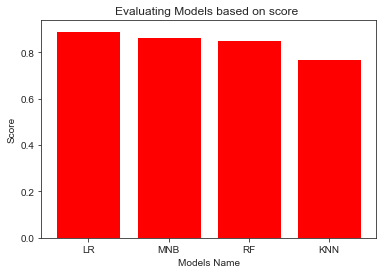

In [39]:
plt.bar('models','score',color='red',data=md_scores)
plt.title('Evaluating Models based on score ')
plt.xlabel('Models Name')
plt.ylabel('Score')
plt.show()

In [40]:
print('Classification Report for Best Model (LR):\n', classification_report(y_test, pred))

Classification Report for Best Model (LR):

               precision    recall  f1-score   support



    negative       0.90      0.88      0.89      7500

    positive       0.88      0.90      0.89      7500



    accuracy                           0.89     15000

   macro avg       0.89      0.89      0.89     15000

weighted avg       0.89      0.89      0.89     15000




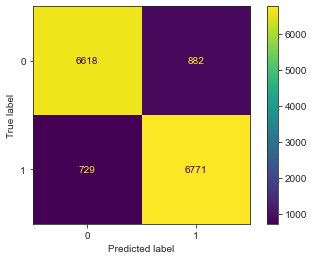

In [41]:
t1 = ConfusionMatrixDisplay(confusion_matrix(y_test, pred))
t1.plot()